<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumGAN-HighEnergyPhysics/blob/main/GAN_HIGH_ENERGY_PHYSICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
if 'google.colab' in str(get_ipython()):
  # install packages needed for this task
  !pip install tensorflow==2.3.1
  !pip install tensorflow_quantum==0.4.0
  !pip install quple==0.7.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 190.8/320.5 MB 124.8 MB/s eta 0:00:02
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.8/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.8/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.rea

In [23]:
!pip install quple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow-quantum==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/10.5 MB 18.1 MB/s eta 0:00:01
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.8/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.8/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.read

In [48]:
import os
import glob
import operator
import numpy as np
import pandas
import h5py
import tensorflow as tf
#import tensorflow_quantum as tfq

In [46]:
!pip install tensorflow-gpu==2.1.0
!pip install cirq==0.7.0 pathos==0.2.5 tensorflow-quantum==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.1.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 KB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

In [6]:
#!/bin/bash
!wget https://cernbox.cern.ch/index.php/s/sHjzCNFTFxutYCj/download -O data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5
!wget https://cernbox.cern.ch/index.php/s/69nGEZjOy3xGxBq/download -O data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5

--2023-03-08 13:54:57--  https://cernbox.cern.ch/index.php/s/sHjzCNFTFxutYCj/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.53.35, 128.142.53.28, 137.138.120.151, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.53.35|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cernbox.cern.ch/s/sHjzCNFTFxutYCj/download [following]
--2023-03-08 13:54:59--  https://cernbox.cern.ch/s/sHjzCNFTFxutYCj/download
Reusing existing connection to cernbox.cern.ch:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5’

data/SingleElectron     [         <=>        ]  82.98M  9.79MB/s    in 9.8s    

2023-03-08 13:55:11 (8.48 MB/s) - ‘data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5’ saved [87010508]

--2023-03-08 13:55:11--  https://cernbox.cern.ch/index.php/s/69nGEZjOy3xGxBq/download
Resolving cernbox.cern.ch (cernbox.cern.ch)..

In [14]:
photon_path = "/content/data/photon.hdf5"
electron_path = "/content/data/electron.hdf5"

In [15]:
# load photon data
with h5py.File(photon_path, "r") as f:
    px = np.asarray(f['X'][()], dtype=np.float32)[:,:,:,0]
    py = np.asarray(f['y'][()], dtype=np.float32)

# load electron data
with h5py.File(electron_path, "r") as f:
    ex = np.asarray(f['X'][()], dtype=np.float32)[:,:,:,0]
    ey = np.asarray(f['y'][()], dtype=np.float32)

In [33]:
from build.lib.quple.utils.visualization import visualize_images
particle_label_map = {
    0: 'photon',
    1: 'electron'
}


In [31]:
!bash create.sh

rm: cannot remove 'dist': No such file or directory
rm: cannot remove 'build': No such file or directory
rm: cannot remove 'quple.egg-info': No such file or directory
running sdist
running egg_info
creating quple.egg-info
writing quple.egg-info/PKG-INFO
writing dependency_links to quple.egg-info/dependency_links.txt
writing requirements to quple.egg-info/requires.txt
writing top-level names to quple.egg-info/top_level.txt
writing manifest file 'quple.egg-info/SOURCES.txt'
Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt
reading manifest file 'quple.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'quple.egg-info/SOURCES.txt'
running check
creating quple-0.9.0
creating quple-0.9.0/quple
creating quple-0.9.0/quple.egg-info
creating quple-0.9.0/quple/circuits
creating quple-0.9.0/quple/circuits/templates
creating quple-0.9.0/quple/circuits/variational_circuits
creatin

#################################################################
Photon energy distribution:


<Figure size 432x288 with 0 Axes>

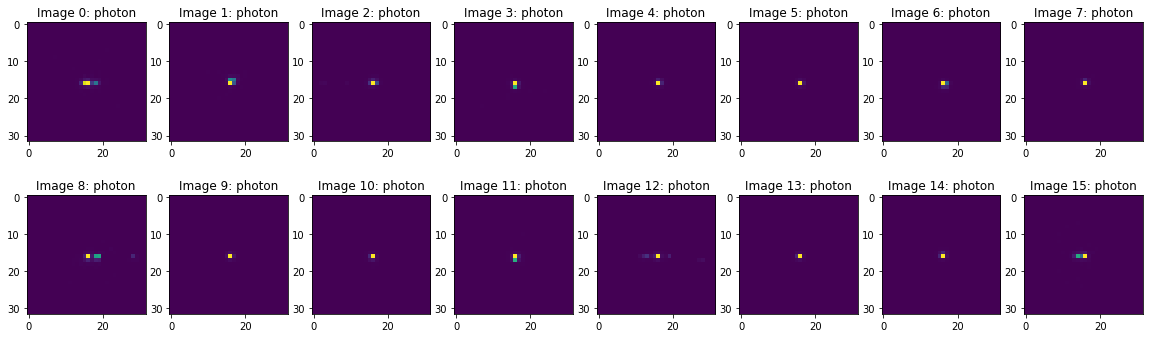

In [34]:
print("#################################################################")
print("Photon energy distribution:")
a = visualize_images(px[:16], labels=py[:16], label_map=particle_label_map)
a.savefig("image_photon_energy_32x32.png", bbox_inches="tight")

In [25]:
!git clone https://github.com/ericardomuten/QMLHEP.git

Cloning into 'QMLHEP'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 405 (delta 34), reused 100 (delta 34), pack-reused 305
Receiving objects: 100% (405/405), 20.60 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [26]:
cd QMLHEP

/content/QMLHEP


#################################################################
Electron energy distribution:


<Figure size 432x288 with 0 Axes>

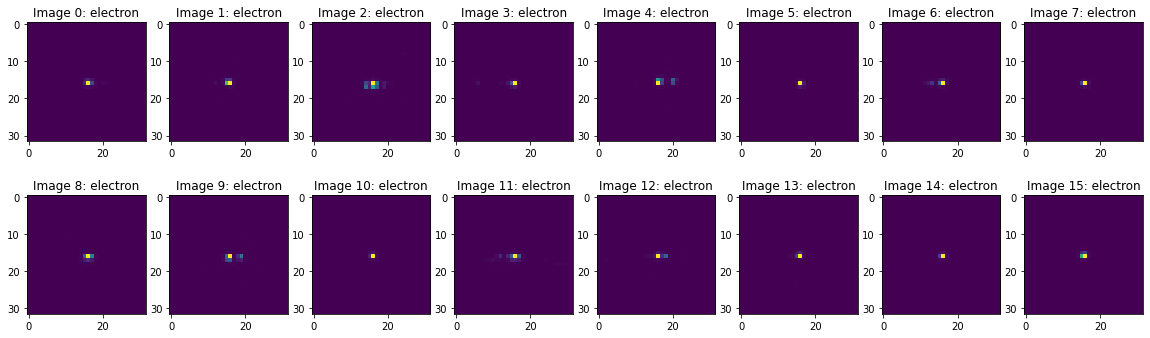

In [35]:
print("#################################################################")
print("Electron energy distribution:")
a = visualize_images(ex[:16], labels=ey[:16], label_map=particle_label_map)
a.savefig("image_electron_energy_32x32.png", bbox_inches="tight")

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(px, py, train_size=0.75, test_size=0.25, random_state=2021)

In [37]:
from build.lib.quple.utils.data_preparation import crop_images
crop_size = (8, 8)
x_train_cropped = crop_images(x_train, dimension=crop_size)
x_test_cropped = crop_images(x_test, dimension=crop_size)

<Figure size 432x288 with 0 Axes>

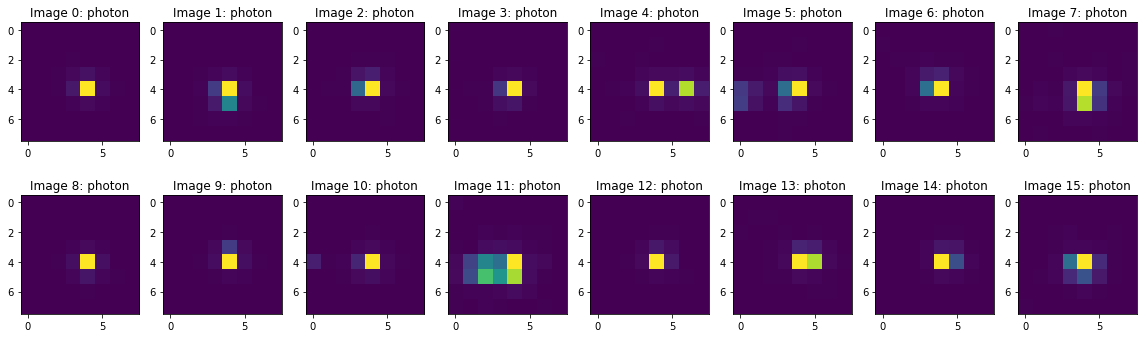

In [38]:
a = visualize_images(x_train_cropped[:16], labels=y_train[:16], label_map=particle_label_map)
a.savefig("image_photon_energy_8x8.png", bbox_inches="tight")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

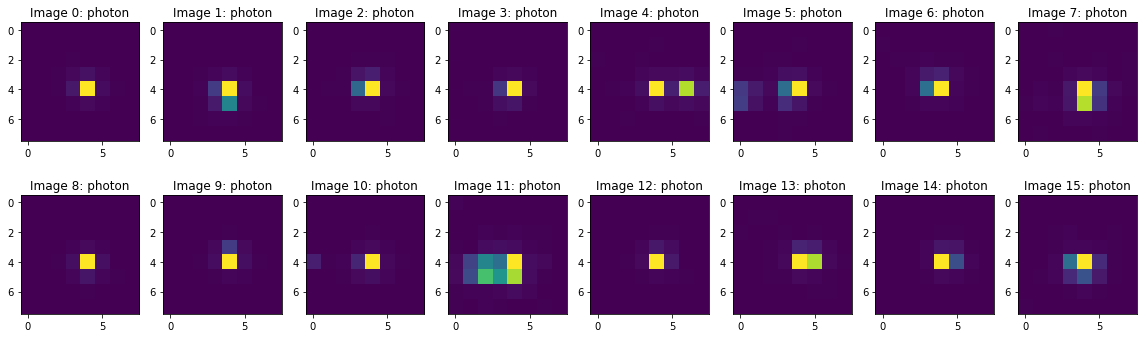

In [39]:
from build.lib.quple.utils.data_preparation import rescale_data
x_train_rescaled, x_test_rescaled = rescale_data(x_train_cropped, x_test_cropped, val_range=(-1, 1))
visualize_images(x_train_rescaled[:16], labels=y_train[:16], label_map=particle_label_map)

In [40]:
x_train_final = np.reshape(x_train_rescaled, (x_train_rescaled.shape[0], 8, 8))
x_test_final = np.reshape(x_test_rescaled, (x_test_rescaled.shape[0], 8, 8))

In [60]:
from build.lib.quple import ParameterisedCircuit
from build.lib.quple.data_encoding import FirstOrderPauliZEncoding
from build.lib.quple.interface.tfq.layers import QConv2D, PQC

NotFoundError: ignored

In [43]:
!python setup.py

usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [59]:
from build.lib.quple.models.generative import QGAN, QWGAN

In [61]:
def create_classical_generator():
    model = tf.keras.Sequential()
    # foundation for 2x2 image
    n_nodes = 64 * 2 * 2
    model.add(tf.keras.layers.Dense(n_nodes, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((2, 2, 64)))

    model.add(tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(1,1), padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    # upsample to 4x4
    model.add(tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())    
    # upsample to 8x8
    model.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(2,2), padding="same", use_bias=False, activation='tanh'))
    return model

def create_classical_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[8, 8, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (2, 2), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    return model

In [62]:
optimizer_kwargs = {
    "generator": {"learning_rate": 5e-4},
    "discriminator": {"learning_rate": 5e-4}
}
generator = create_classical_generator()
discriminator = create_classical_discriminator()
classical_gan = QGAN(generator, discriminator,
            epochs=70, batch_size=16,
            n_disc=1,
            optimizer="adam",
            optimizer_kwargs=optimizer_kwargs,
            random_state=2021, 
            checkpoint_dir="./training_checkpoints/GAN/photon_image_8x8")
classical_gan.enable_visualization((8, 8), n_image=16)

Summary of Generator
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               25600     
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)               0         
                                                                 
 reshape_1 (Reshape)         (None, 2, 2, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 2, 2, 32)         8192      
 ranspose)                                                       
                                                                 
 batch_normalization_4 (Batc  (No

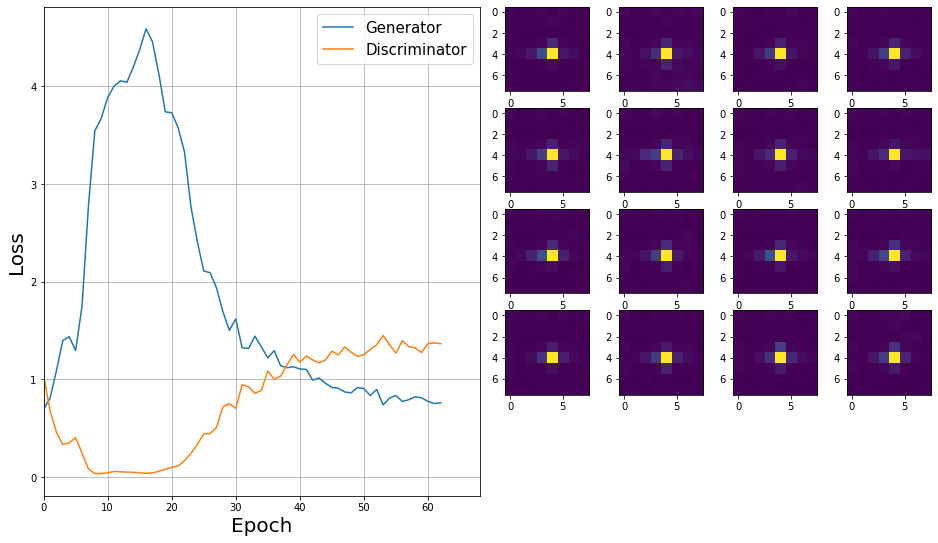

In [ ]:
classical_gan.train(x_train_final[:200])